In [80]:
from scipy.io import wavfile
import numpy as np
import pylab as pl
import wavio
from sklearn.decomposition import FastICA

from scipy.io import wavfile
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt


In [81]:
# Parameters
rate = 44100    # samples per second
T = 10           # sample duration (seconds)
f = 440.0       # sound frequency (Hz)
samples = T * rate

x = np.arange(samples)
y1 = np.sin(2*np.pi * f * x / rate)

y2 = signal.sawtooth(2*np.pi*f*x/rate)
y3 = signal.chirp(x, f0=1500, f1=250, t1=10, method='quadratic')

In [82]:
# Write the samples to a file
wavio.write("sine.wav", y3, rate, sampwidth=4)

In [83]:
rate, audio = wavfile.read("Heroes.wav")

try:
    audio = np.mean(audio, axis=1)
except:
    print("mean function passed")

M = 1024

Audio length: 217.73 seconds


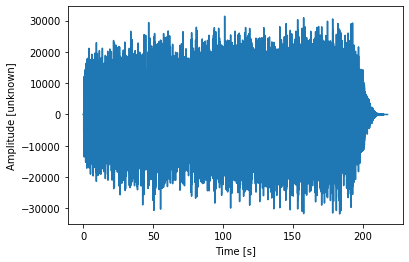

In [84]:
N = audio.shape[0]
L = N / rate

print(f'Audio length: {L:.2f} seconds')

f, ax = plt.subplots()
ax.plot(np.arange(N) / rate, audio)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude [unknown]');

In [85]:
freqs, times, spectro = signal.spectrogram(audio, fs=rate, window='hanning',nperseg=1024, noverlap=M - 100,detrend=False, scaling='spectrum')

In [86]:
spectro = np.log10(spectro + 1)

spectro = (spectro - np.min(spectro))/np.ptp(spectro) 

In [87]:
spectro = 255 * spectro

spectro = spectro.astype(np.uint8)

print(spectro)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [88]:

# def replaceZeroes(data):
#   min_nonzero = np.min(data[np.nonzero(data)])
#   data[data == 0] = min_nonzero
#   return data

# spectro = replaceZeroes(spectro)

# spectro = np.log10(spectro)

Text(0.5, 0, 'Time [s]')

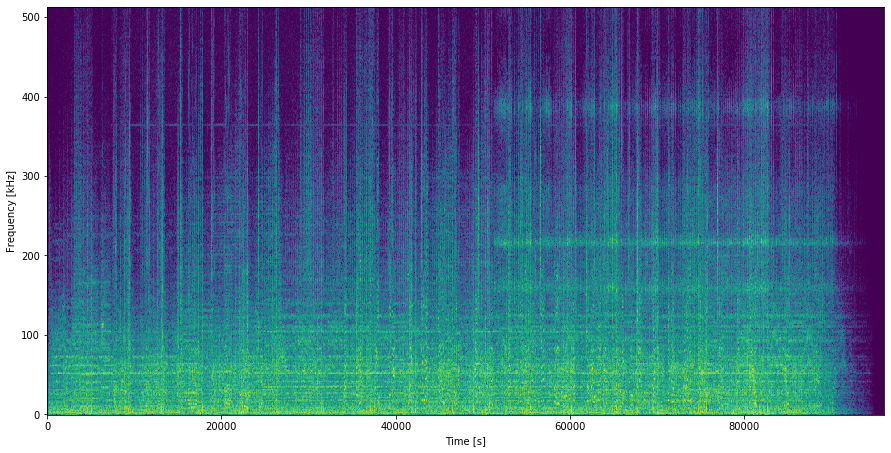

In [89]:
f, ax = plt.subplots(figsize=(15, 7.5))
# %time im = ax.pcolormesh(times, freqs, 10 * np.log10(spectro))
plt.imshow(spectro,aspect='auto')
ax.invert_yaxis()

ax.set_ylabel('Frequency [kHz]')
ax.set_xlabel('Time [s]')

In [107]:
ica = FastICA(n_components= 8)
# ica = FastICA()

print("performing ica.fit_transform")
S_ = ica.fit_transform(spectro)  # Reconstruct signals
print(S_.shape)

performing ica.fit_transform


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/decomposition/fastica_.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


(513, 8)


In [108]:
print(S_.shape)
print(S_[0])

(513, 8)
[ 0.01046551  0.14451766  0.02034062 -0.1404827  -0.03754005  0.12364429
  0.05085038  0.00188129]


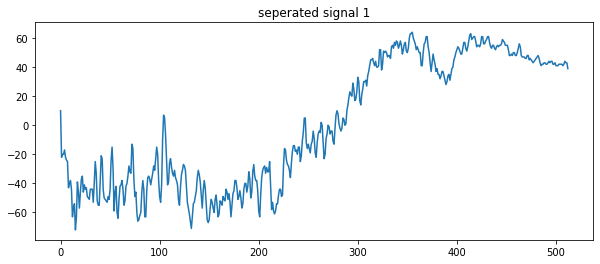

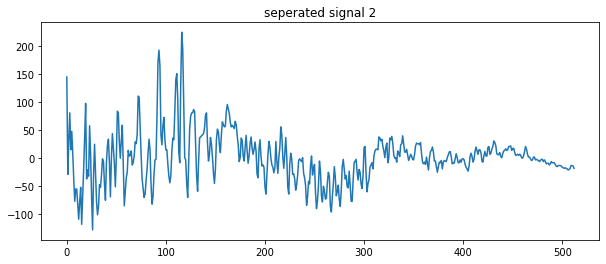

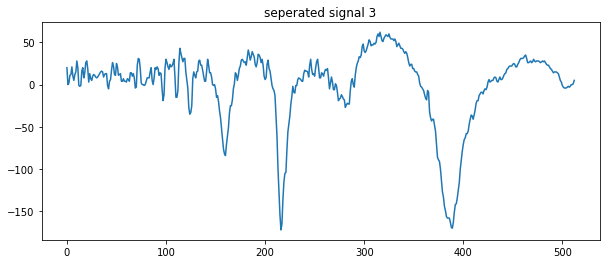

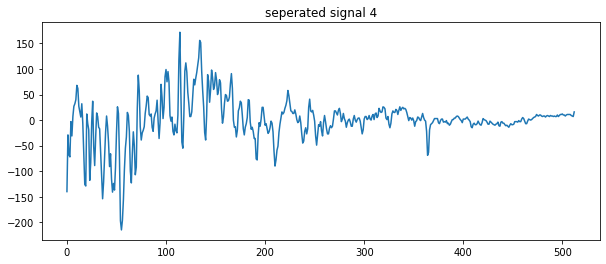

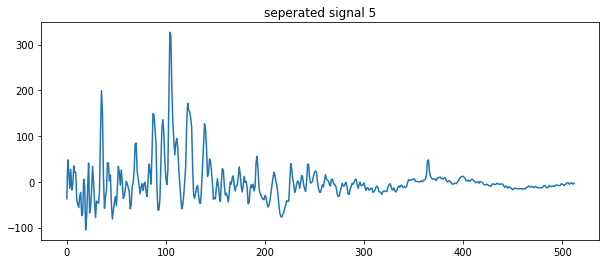

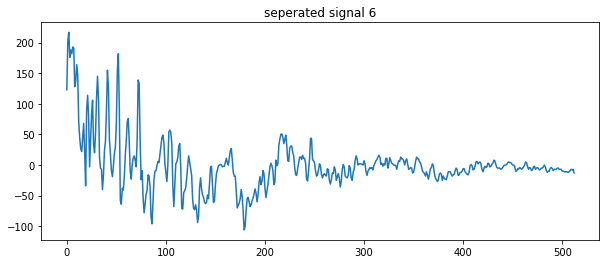

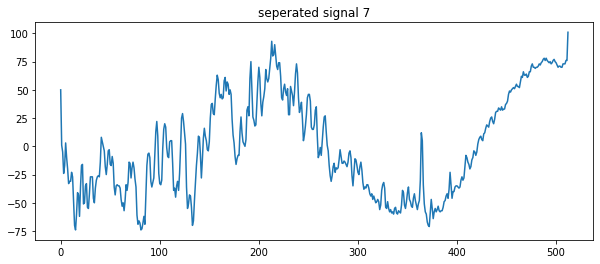

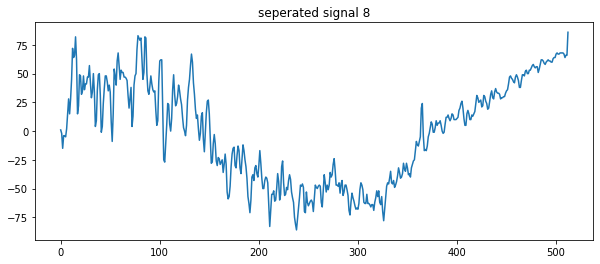

In [111]:
for i in range (S_.shape[1]):
    
    pl.figure(figsize= (10,4))
    pl.plot((1000*S_[:,i]).astype(np.int16))
    pl.title('seperated signal %s' % str(i + 1))
    pl.show()

Text(0, 0.5, 'Signal amplitude')

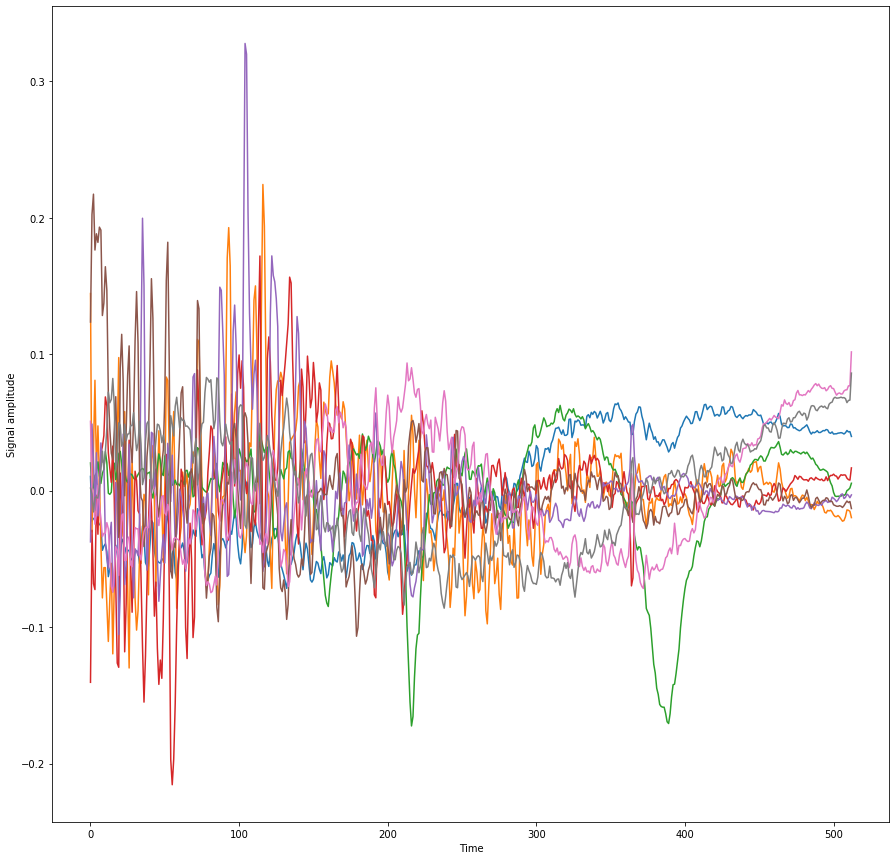

In [112]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.plot(range(len(S_)), S_)
ax.set_xlabel('Time')
ax.set_ylabel('Signal amplitude')
